In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from xgboost import XGBClassifier

In [12]:
df=pd.read_csv("C:/Users/SAKSHI/Downloads/CL 1/Iris.csv")

df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
print("\nTotal Rows:", df.shape[0])
print("Total Columns:", df.shape[1])
print("\nColumn Names:")
print(df.columns.tolist())
# Check for missing values
print("\nMissing Values in Each Column:")
print(df.isnull().sum())



Total Rows: 150
Total Columns: 6

Column Names:
['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']

Missing Values in Each Column:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


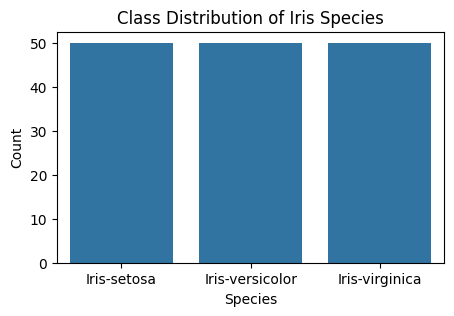

In [14]:
plt.figure(figsize=(5,3))
sns.countplot(x='Species', data=df)
plt.title("Class Distribution of Iris Species")
plt.xlabel("Species")
plt.ylabel("Count")
plt.show()

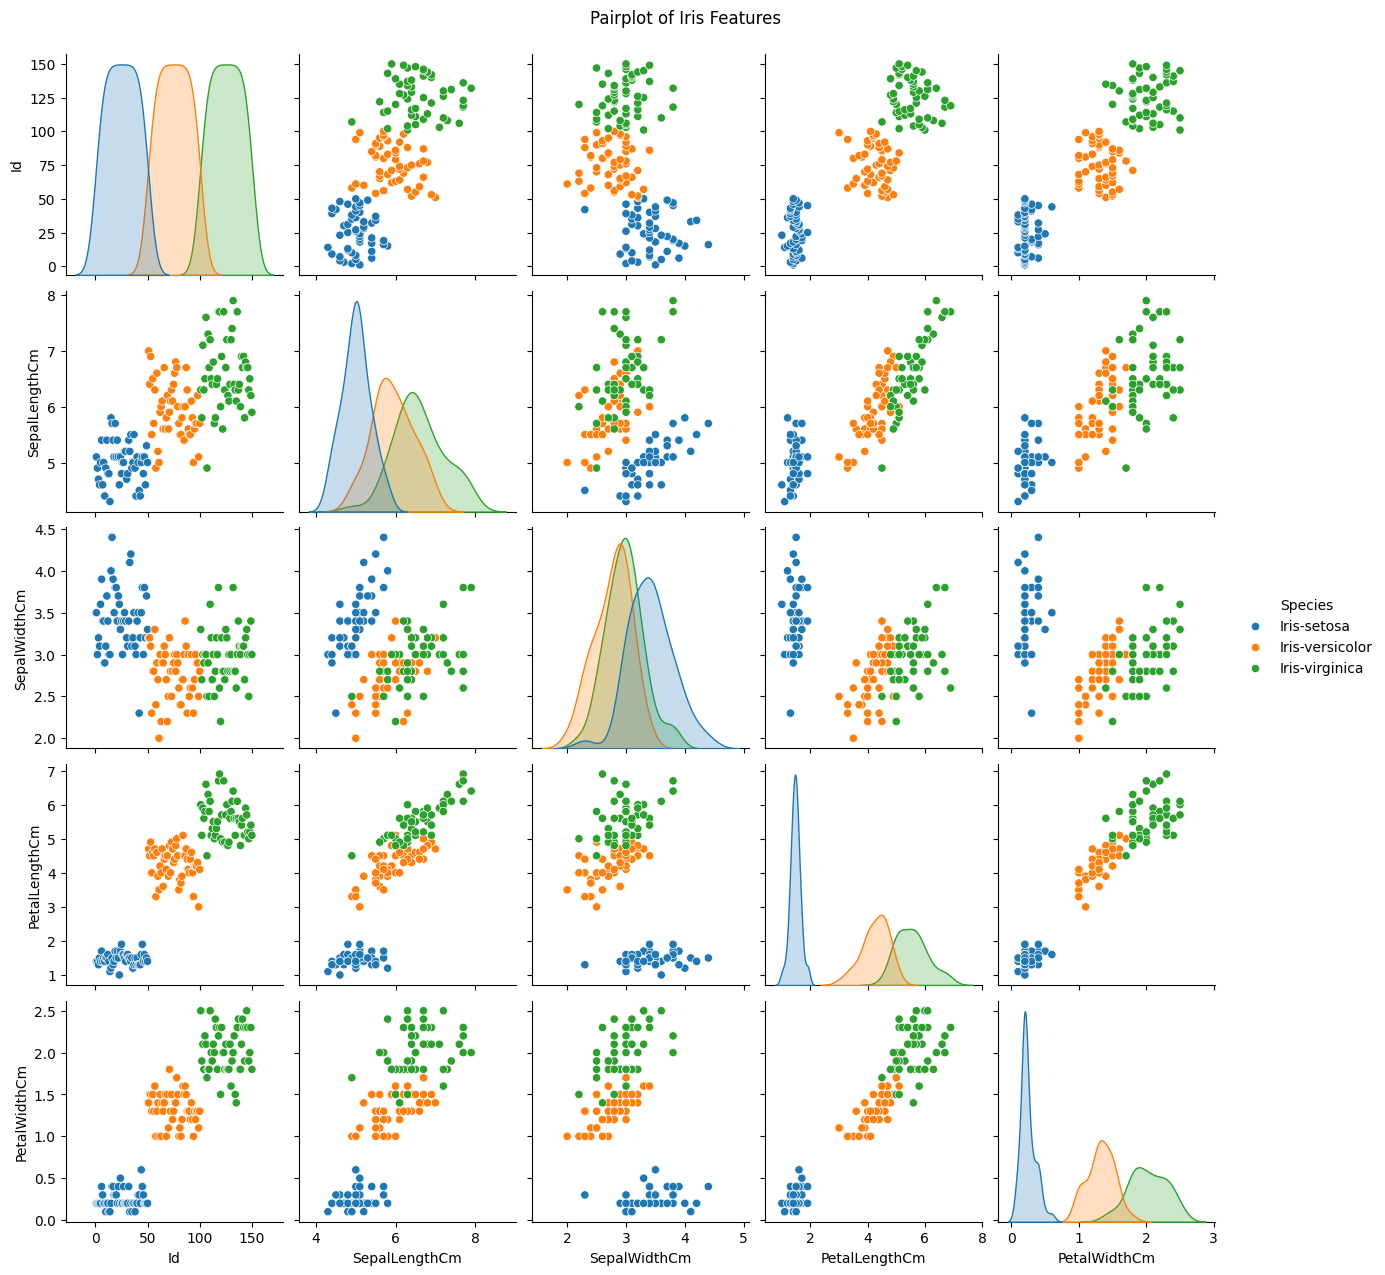

In [15]:
sns.pairplot(df, hue="Species")
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()

In [16]:
if 'Id' in df.columns:
  df = df.drop(columns=['Id'])
# Encode target variable
le = LabelEncoder()
df['Species'] = le.fit_transform(df['Species'])

X = df.drop('Species', axis=1)
y = df['Species']
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.2, random_state=42
)
print("\nTraining set size:", X_train.shape)
print("Testing set size:", X_test.shape)


Training set size: (120, 4)
Testing set size: (30, 4)


In [17]:
ada=AdaBoostClassifier(n_estimators=100, random_state=42)
gbm=GradientBoostingClassifier(n_estimators=100, random_state=42)
xgb=XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')

In [18]:
ada.fit(X_train, y_train)

,estimator,None
,n_estimators,100
,learning_rate,1.0
,algorithm,'deprecated'
,random_state,42


In [19]:
gbm.fit(X_train, y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [20]:
xgb.fit(X_train, y_train)

C:\Users\SAKSHI\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:44:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [21]:
y_pred_ada=ada.predict(X_test)
y_pred_gbm=gbm.predict(X_test)
y_pred_xgb=xgb.predict(X_test)

In [22]:
print("\nAdaBoost Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_ada))
print(classification_report(y_test, y_pred_ada))

print("\nGradient Boosting Performanc")
print("Accuracy:", accuracy_score(y_test, y_pred_gbm))
print(classification_report(y_test, y_pred_gbm))

print("\nXGBoost Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


AdaBoost Performance
Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.89      0.89      0.89         9
           2       0.91      0.91      0.91        11

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30


Gradient Boosting Performanc
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


XGBoost Performance
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10

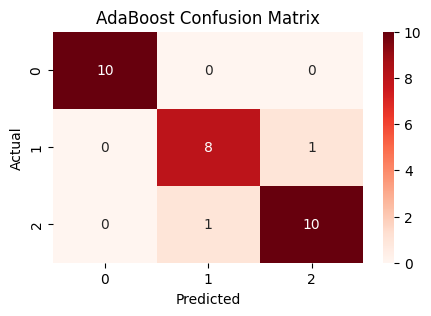

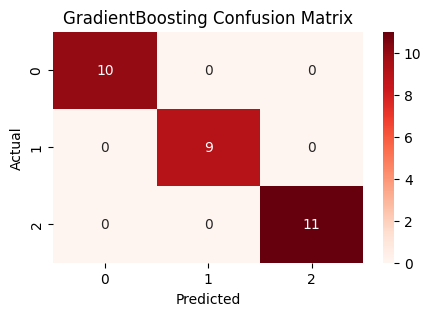

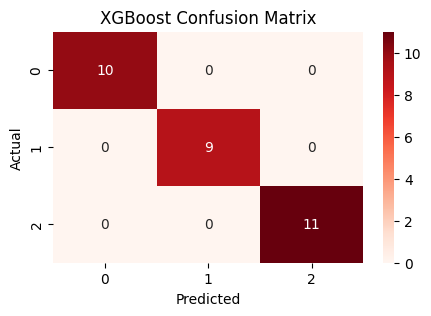

In [23]:
models=['AdaBoost','GradientBoosting','XGBoost']
preds=[y_pred_ada,y_pred_gbm,y_pred_xgb]

for i,pred in enumerate(preds):
  plt.figure(figsize=(5,3))
  sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='d', cmap='Reds')
  plt.title(f'{models[i]} Confusion Matrix')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.show()

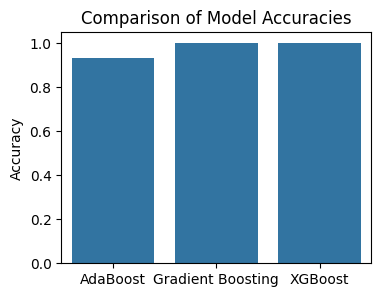

In [24]:
acc_scores = {
'AdaBoost': accuracy_score(y_test, y_pred_ada),
'Gradient Boosting': accuracy_score(y_test, y_pred_gbm),
'XGBoost': accuracy_score(y_test, y_pred_xgb)
}
plt.figure(figsize=(4,3))
sns.barplot(x=list(acc_scores.keys()), y=list(acc_scores.values()))
plt.title("Comparison of Model Accuracies")
plt.ylabel("Accuracy")
plt.show()

C:\Users\SAKSHI\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:44:51] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== Voting Classifier (Soft Voting) ===
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



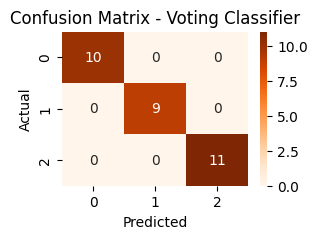

In [25]:
voting_clf = VotingClassifier(
estimators=[('ada', ada), ('gbm', gbm), ('xgb', xgb)],
voting='soft'
)
voting_clf.fit(X_train, y_train)
y_pred_vote = voting_clf.predict(X_test)
print("\n=== Voting Classifier (Soft Voting) ===")
print("Accuracy:", accuracy_score(y_test, y_pred_vote))
print(classification_report(y_test, y_pred_vote))
cm = confusion_matrix(y_test, y_pred_vote)
plt.figure(figsize=(3,2))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges')
plt.title("Confusion Matrix - Voting Classifier")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()